# [Tarea 06] Ejercicios unidad 03-A

En el presente notebook, encontraremos ejercicios relacionados con la interpolacion, como:<br>
- Series de Taylor
- Polinomios de Lagrange<br>

### PRIMER EJERCICO

$f(x) = \frac{1}{25x^2 + 1}$ con $x_0=0$

#### POLINOMIO DE LAGRANGE

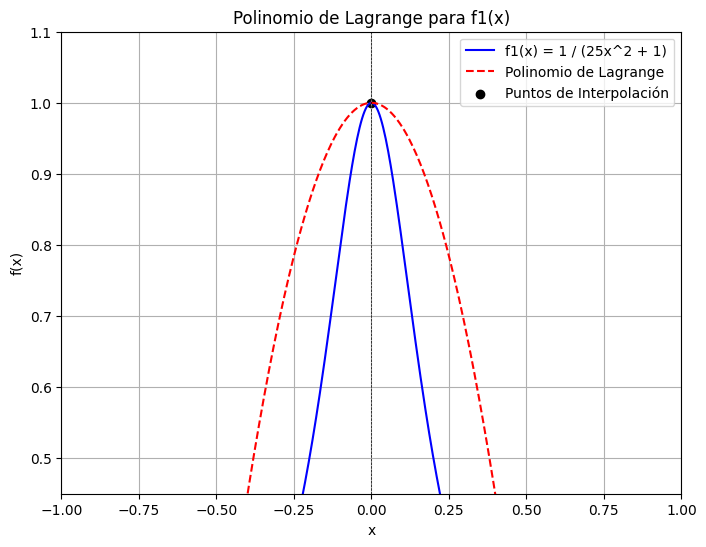

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función original
def f1(x):
    return 1 / (25 * x**2 + 1)

# Puntos de interpolación
x_points = np.array([-0.5, 0, 0.5])
y_points = f1(x_points)

# Polinomio de Lagrange
def lagrange_interpolation(x, x_points, y_points):
    n = len(x_points)
    P = 0
    for i in range(n):
        L = 1
        for j in range(n):
            if i != j:
                L *= (x - x_points[j]) / (x_points[i] - x_points[j])
        P += L * y_points[i]
    return P

# Valores para graficar
x_vals = np.linspace(-1, 1, 500)
f1_vals = f1(x_vals)
lagrange_vals = [lagrange_interpolation(x, x_points, y_points) for x in x_vals]

# Gráfica
plt.figure(figsize=(8, 6))
plt.xlim(-1, 1)
plt.ylim(0.45, 1.1)
plt.plot(x_vals, f1_vals, label="f1(x) = 1 / (25x^2 + 1)", color="blue")
plt.plot(x_vals, lagrange_vals, '--', label="Polinomio de Lagrange", color="red")
plt.scatter(x_points, y_points, color="black", label="Puntos de Interpolación")
plt.title("Polinomio de Lagrange para f1(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()


#### SERIE DE TAYLOR

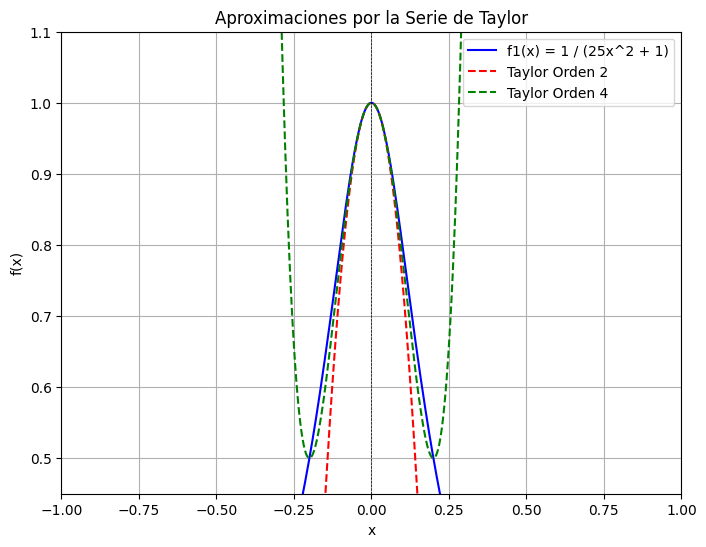

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función original
def f1(x):
    return 1 / (25 * x**2 + 1)

# Aproximaciones de Taylor
def taylor_2(x):
    return 1 - 25 * x**2

def taylor_4(x):
    return 1 - 25 * x**2 + (625 * x**4) / 2

# Valores para graficar
x_vals = np.linspace(-1, 1, 500)
f1_vals = f1(x_vals)
t2_vals = taylor_2(x_vals)
t4_vals = taylor_4(x_vals)

# Gráfica
plt.figure(figsize=(8, 6))

# Ajustar límites para centrarse en la región de interés
plt.xlim(-1, 1)
plt.ylim(0.45, 1.1)

plt.plot(x_vals, f1_vals, label="f1(x) = 1 / (25x^2 + 1)", color="blue")
plt.plot(x_vals, t2_vals, '--', label="Taylor Orden 2", color="red")
plt.plot(x_vals, t4_vals, '--', label="Taylor Orden 4", color="green")

# Etiquetas y detalles
plt.title("Aproximaciones por la Serie de Taylor")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()


#### GRAFICA DE POLINOMIO DE LAGRANGE Y SERIE DE TAYLOR

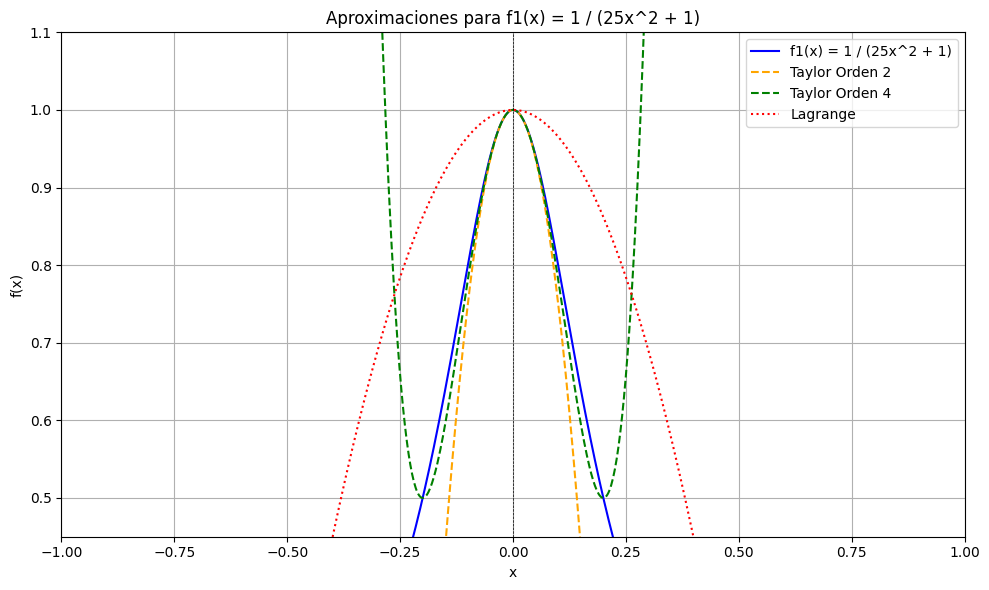

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Funciones originales
def f1(x):
    return 1 / (25 * x**2 + 1)

# Polinomios de Taylor para f1 (1 / (25x^2 + 1)) alrededor de x0 = 0
def taylor_f1_order_2(x):
    return 1 - 25 * x**2

def taylor_f1_order_4(x):
    return 1 - 25 * x**2 + (625 * x**4) / 2

# Polinomio de Lagrange
def lagrange_interpolation(x, x_points, y_points):
    """
    Construye el polinomio de Lagrange.
    """
    n = len(x_points)
    P = 0
    for i in range(n):
        L = 1
        for j in range(n):
            if i != j:
                L *= (x - x_points[j]) / (x_points[i] - x_points[j])
        P += L * y_points[i]
    return P

# Puntos para Lagrange (elegidos arbitrariamente cercanos a 0)
x_points = np.array([-0.5, 0, 0.5])

# Lagrange para f1
y_points_f1 = f1(x_points)
lagrange_f1 = lambda x: lagrange_interpolation(x, x_points, y_points_f1)

# Valores de x para graficar (en un rango más pequeño)
x_vals = np.linspace(-0.5, 0.5, 500)

# Gráficas
plt.figure(figsize=(10, 6))

# Gráfica para f1
plt.plot(x_vals, f1(x_vals), label="f1(x) = 1 / (25x^2 + 1)", color="blue")
plt.plot(x_vals, taylor_f1_order_2(x_vals), '--', label="Taylor Orden 2", color="orange")
plt.plot(x_vals, taylor_f1_order_4(x_vals), '--', label="Taylor Orden 4", color="green")
plt.plot(x_vals, lagrange_f1(x_vals), ':', label="Lagrange", color="red")

# Ajustar límites para centrarse en la región de interés
plt.xlim(-1, 1)
plt.ylim(0.45, 1.1)

# Etiquetas y leyenda
plt.title("Aproximaciones para f1(x) = 1 / (25x^2 + 1)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()

plt.grid()
plt.tight_layout()
plt.show()


En la gráfica, se puede ver que la **función original** $f(x) = \frac{1}{25x^2 + 1}$ tiene un comportamiento suave cerca de $x_0 = 0$. La **Serie de Taylor de orden 2** aproxima bien la función solo en ese punto, pero se aleja mucho de la función cuando $x$ se aleja de 0. La **Serie de Taylor de orden 4** da una mejor aproximación en un rango más amplio, pero aún se desvía un poco de la función real fuera de $x = 0$. Por otro lado, el **Polinomio de Lagrange**, que pasa por los puntos $x = -0.5, 0, 0.5 $, tiene un comportamiento oscilante, lo que provoca que se aleje de la función original fuera de esos puntos. Mientras que la **Serie de Taylor** se mantiene más estable y confiable cerca de $x_0$, el **Polinomio de Lagrange** muestra más imprecisión en las áreas fuera de los puntos seleccionados.

### SEGUNDO EJERCICIO
$f(x)=arctan(c)$ para $x_0=0$

#### POLINOMIO DE LAGRANGE

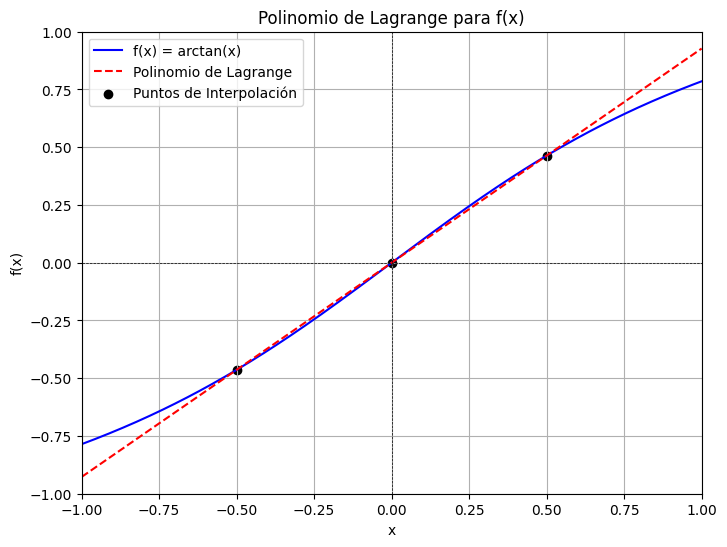

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función original
def f1(x):
    return np.arctan(x)

# Puntos de interpolación
x_points = np.array([-0.5, 0, 0.5])
y_points = f1(x_points)

# Polinomio de Lagrange
def lagrange_interpolation(x, x_points, y_points):
    n = len(x_points)
    P = 0
    for i in range(n):
        L = 1
        for j in range(n):
            if i != j:
                L *= (x - x_points[j]) / (x_points[i] - x_points[j])
        P += L * y_points[i]
    return P

# Valores para graficar
x_vals = np.linspace(-1, 1, 500)
f1_vals = f1(x_vals)
lagrange_vals = [lagrange_interpolation(x, x_points, y_points) for x in x_vals]

# Gráfica
plt.figure(figsize=(8, 6))
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.plot(x_vals, f1_vals, label="f(x) = arctan(x)", color="blue")
plt.plot(x_vals, lagrange_vals, '--', label="Polinomio de Lagrange", color="red")
plt.scatter(x_points, y_points, color="black", label="Puntos de Interpolación")
plt.title("Polinomio de Lagrange para f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()


#### SERIE DE TAYLOR

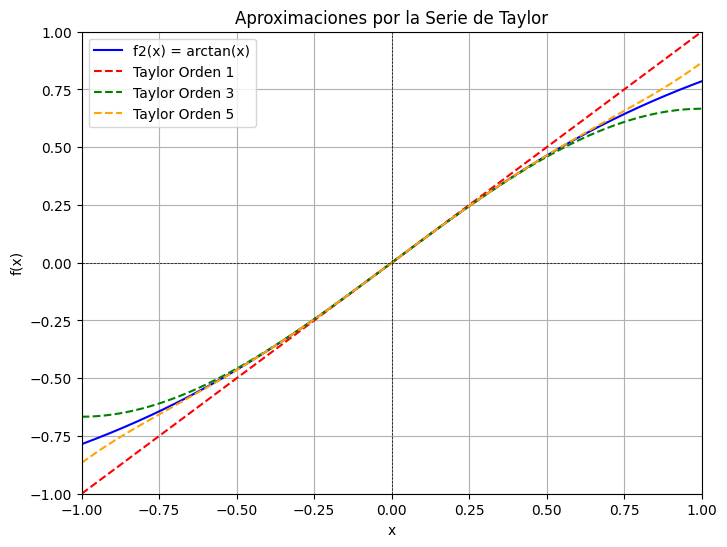

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función original
def f2(x):
    return np.arctan(x)

# Aproximaciones de Taylor
def taylor_1(x):
    return x

def taylor_3(x):
    return x - (x**3) / 3

def taylor_5(x):
    return x - (x**3) / 3 + (x**5) / 5

# Valores para graficar
x_vals = np.linspace(-1, 1, 500)
f2_vals = f2(x_vals)
t1_vals = taylor_1(x_vals)
t3_vals = taylor_3(x_vals)
t5_vals = taylor_5(x_vals)

# Gráfica
plt.figure(figsize=(8, 6))

# Ajustar límites para centrarse en la región de interés
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Graficar las diferentes aproximaciones
plt.plot(x_vals, f2_vals, label="f2(x) = arctan(x)", color="blue")
plt.plot(x_vals, t1_vals, '--', label="Taylor Orden 1", color="red")
plt.plot(x_vals, t3_vals, '--', label="Taylor Orden 3", color="green")
plt.plot(x_vals, t5_vals, '--', label="Taylor Orden 5", color="orange")

# Etiquetas y detalles
plt.title("Aproximaciones por la Serie de Taylor")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()


#### GRAFICA DE POLINOMIO DE LAGRANGE Y SERIE DE TAYLOR

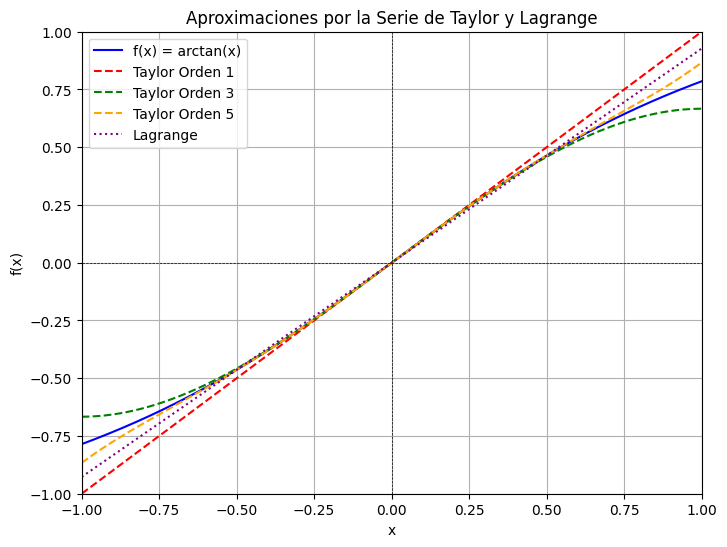

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función original
def f2(x):
    return np.arctan(x)

# Aproximaciones de Taylor
def taylor_1(x):
    return x

def taylor_3(x):
    return x - (x**3) / 3

def taylor_5(x):
    return x - (x**3) / 3 + (x**5) / 5

# Polinomio de Lagrange (utilizando puntos cercanos a 0)
def lagrange_interpolation(x, x_points, y_points):
    n = len(x_points)
    P = 0
    for i in range(n):
        L = 1
        for j in range(n):
            if i != j:
                L *= (x - x_points[j]) / (x_points[i] - x_points[j])
        P += L * y_points[i]
    return P

# Puntos para Lagrange (elegidos arbitrariamente cercanos a 0)
x_points = np.array([-0.5, 0, 0.5])
y_points_f2 = f2(x_points)
lagrange_f2 = lambda x: lagrange_interpolation(x, x_points, y_points_f2)

# Valores para graficar
x_vals = np.linspace(-1, 1, 500)
f2_vals = f2(x_vals)
t1_vals = taylor_1(x_vals)
t3_vals = taylor_3(x_vals)
t5_vals = taylor_5(x_vals)
lagrange_vals = lagrange_f2(x_vals)

# Gráfica
plt.figure(figsize=(8, 6))

# Ajustar límites para centrarse en la región de interés
plt.xlim(-1, 1)
plt.ylim(-1, 1)

plt.plot(x_vals, f2_vals, label="f(x) = arctan(x)", color="blue")
plt.plot(x_vals, t1_vals, '--', label="Taylor Orden 1", color="red")
plt.plot(x_vals, t3_vals, '--', label="Taylor Orden 3", color="green")
plt.plot(x_vals, t5_vals, '--', label="Taylor Orden 5", color="orange")
plt.plot(x_vals, lagrange_vals, ':', label="Lagrange", color="purple")

# Etiquetas y detalles
plt.title("Aproximaciones por la Serie de Taylor y Lagrange")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()


En la gráfica de la segunda función, $f(x) = arctan(x)$, se observa que la **Serie de Taylor de orden 2**, que se aproxima a la función cerca de $x_0 = 0$, tiene un buen ajuste solo en el punto de expansión, pero rápidamente se aleja de la función cuando $x$ aumenta. La **Serie de Taylor de orden 4** mejora la aproximación en un rango más amplio alrededor de $x_0 = 0$, pero aún muestra cierto error en valores mayores de $x$. En contraste, el **Polinomio de Lagrange**, que interpola a partir de los puntos seleccionados, ajusta muy bien la función en esos puntos específicos, pero fuera de ellos muestra un comportamiento oscilante, desviándose considerablemente de la función original. En conclusion, aunque la **Serie de Taylor** es más precisa cerca del punto de expansión, el **Polinomio de Lagrange** tiene dificultades al extrapolar fuera de los puntos de interpolación, mostrando más imprecisión a medida que se aleja de estos puntos.